<h1><center>Deep Learning</center></h1>


In [2]:
# Include libraries which may use in implementation
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize    
        #weights
        self.W1 = np.random.rand(inputSize* outputSize) # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, outputSize) that +1 is for bias    
        self.bias = np.random.rand(1)
        
    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. sigmoid)    
       
        h = np.dot(X, self.W1.T) + self.bias
        y_hat = self.sigmoid(h)
        return y_hat # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return (1/(1 + np.exp(-s)))  # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return s*(1-s) # apply derivative of sigmoid on s and return it's value 

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of sigmoid to the error
        # adjust set of weights
        
        # Understanding
        # derv of loss wrt weights = (derv LOSS w.r.t a) * (derv of sig w.r.t z) * (derv of z w.r.t w.x+b  )
        # Also derv of loss wrt thetas = [Ypred - Y] * (X.T)
        
        # But for the sake of understanding whole and doing it throughly
        # (derv LOSS w.r.t a) = [-(Y/Y_pred) + ((1-Y)/(1-Y_pred))]
        # (derv of sig w.r.t z) = sigmoid_derivative
        # (derv of z w.r.t w.x+b  ) = X if W else 
         
        error =  self.crossentropy(Y,y_pred)
        derv_wrt_a = (-(Y/y_pred) + ((1-Y)/(1-y_pred)))
        derv_wrt_z = self.sigmoid_derivative(y_pred)
        first_2_terms = derv_wrt_a * derv_wrt_z
        
        derv_wrt_Ws = np.dot(X.T, first_2_terms )
        derv_wrt_b =   np.dot(first_2_terms , np.ones(len(Y)) )
        
        #updating
        self.W1 = self.W1 - (lr * derv_wrt_Ws)
        self.bias = self.bias - (lr *  derv_wrt_b )
        
        return error

        
    
    def crossentropy(self, Y, Y_pred):
        
        # compute error based on crossentropy loss 
        error =  -(1/len(Y)) * np.sum( ( Y * np.log(Y_pred)) + ((1-Y) * np.log(1-Y_pred)) ) #error
        return error
        
        
    def train(self, trainX, trainY, epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
        
        vald_errors = list()
        train_errors = list()
        accuracies = list()
        for i in range(1,epochs+1):
            print(i,"epoch...")
            # feed forward trainX and trainY and recivce predicted value
            y_pred = self.feedforward(trainX)
            # backpropagation with trainX, trainY, predicted value and learning rate.
            cost = self.backwardpropagate(trainX,trainY,y_pred,learningRate)
            # if validationX and validationY are not null than show validation accuracy and error of the model.
            train_errors.append(cost)
            if validationX.any() != None : 
                print("Validating..")
                val_pred = self.predict(validationX)
                accuracy = self.accuracy(validationX,validationY)
                print("accuracy at {} : {}".format(i,accuracy))
                error = self.crossentropy(validationY, val_pred)
                print("error:", error )
                accuracies.append(accuracy)
                vald_errors.append(error)


            
        # plot error of the model if plot_err is true
        plt.title("Loss function w.r.t Epochs")
        plt.plot(train_errors)
        plt.xlabel("Epochs")
        plt.ylabel("Error")
        
        if plot_err:
            plt.plot(vald_errors)
            
        plt.legend({"train","validation"})
        
        

    def predict(self, testX):
        # predict the value of testX
        val_pred = self.sigmoid( np.dot(testX,self.W1.T) + self.bias)
        return val_pred
            
    def accuracy(self, testX, testY):
        # predict the value of trainX
        predictions = self.predict(testX)
        predictions = np.where(predictions<0.5,0,1)
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        
        count = 0
        for pred,org in zip(predictions,testY):
            if int(pred) == org:
                count += 1
            
            
        return "{:.2f}".format(count/len(testY) *100)  # return accuracy    
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        weights = {"Ws":self.W1, "bias":self.bias}
        with open(name, 'wb') as obj:
            pickle.dump(weights,obj)

        
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        with open(name, 'rb') as obj:
            weights = pickle.load(obj)
            self.W1 = weights["Ws"]
            self.bias = weights["bias"]
    

    

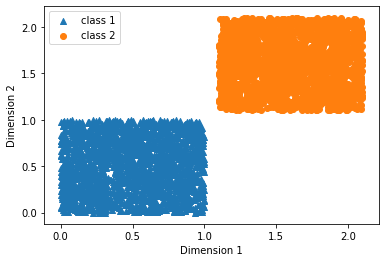

In [9]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [10]:
class1.shape, class2.shape

((2000, 2), (2000, 2))

In [11]:
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)

#Note: shuffle this dataset before dividing it into three parts

np.random.seed(34)
length = len(data)
#data index array
d = np.arange(0,length)


shuffle_choice = np.random.choice(d, length, replace=False)
#will give me shuffled data in both array with same index shuffled at other array
shuffled_X = data[shuffle_choice]
shuffled_y = label[shuffle_choice]


train_data_length = 70 #how much percent
validation_data_length = 15
test_data_length = 15

print("{}% data for training...".format(train_data_length))
print("{}% data for validation...".format(validation_data_length))
print("{}% data for testing...".format(test_data_length))

select_train_data = int((length * train_data_length) / 100)
select_validation_data =  int( (length * (validation_data_length)) / 100)
select_test_data =  int((length * test_data_length) / 100)
 
print(select_train_data)
print(select_validation_data)
print(select_test_data)

# Distribute this data into three parts i.e. training, validation and testing
trainX = shuffled_X[:select_train_data] # training data point
trainY = shuffled_y[:select_train_data] # training lables

validX = shuffled_X[select_train_data : select_train_data+ select_validation_data ]  # validation data point
validY = shuffled_y[select_train_data : select_train_data+ select_validation_data ]# validation lables

testX = shuffled_X[select_train_data+ select_validation_data :  ]# testing data point
testY = shuffled_y[select_train_data+ select_validation_data : ]# testing lables


trainX.shape, validX.shape, testX.shape

70% data for training...
15% data for validation...
15% data for testing...
2800
600
600


((2800, 2), (600, 2), (600, 2))

1 epoch...
Validating..
accuracy at 1 : 52.67
error: 0.8672502974089233
2 epoch...
Validating..
accuracy at 2 : 81.83
error: 0.4338397305397702
3 epoch...
Validating..
accuracy at 3 : 93.33
error: 0.3850938306131079
4 epoch...
Validating..
accuracy at 4 : 93.67
error: 0.340773809053471
5 epoch...
Validating..
accuracy at 5 : 97.67
error: 0.3091952232735256
6 epoch...
Validating..
accuracy at 6 : 97.67
error: 0.2807756529098392
7 epoch...
Validating..
accuracy at 7 : 98.33
error: 0.2587114540823028
8 epoch...
Validating..
accuracy at 8 : 99.17
error: 0.2394146923372756
9 epoch...
Validating..
accuracy at 9 : 99.67
error: 0.22327015973110048
10 epoch...
Validating..
accuracy at 10 : 99.83
error: 0.20924042720124802
11 epoch...
Validating..
accuracy at 11 : 100.00
error: 0.19705500943398602
12 epoch...
Validating..
accuracy at 12 : 100.00
error: 0.1863416186996931
13 epoch...
Validating..
accuracy at 13 : 100.00
error: 0.1768565375478024
14 epoch...
Validating..
accuracy at 14 : 100.00
er

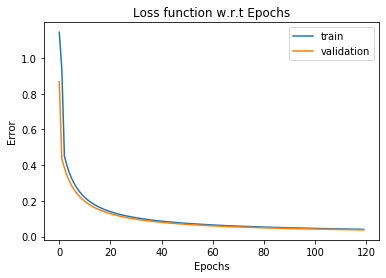

In [14]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 120, learningRate = 0.001, validationX = validX, validationY = validY)

In [17]:
model.accuracy(testX,testY)

'100.00'

In [18]:
#save the best model which you have trained, 
model.saveModel('task1_model/bestmodel.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [19]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('task1_model/bestmodel.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)




'100.00'